In [25]:
from psiam_tied_no_dv_map_utils import rho_A_t_fn, all_RTs_fit_single_t_fn, all_RTs_fit_OPTIM_fn

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, simpson

In [31]:
# sample params

V_A = 1.3
theta_A = 1.85

# stim params
ABL_arr = [60]
ILD_arr = [0]

# Model params
rate_lambda = 0.076
theta_E = 50.7
T_0 = 0.19*(1e-3)
t_non_decision = 78e-3

t_stim = 0.1
t_A_aff = 0.01
t_E_aff = 0.02
t_motor = 0.03

Z_E = 30
L = 1

In [27]:
t_pts = np.linspace(0, 2, 1000)
K_max = 10
ABL = 20
ILD = 0

theory_all = all_RTs_fit_OPTIM_fn(t_pts, V_A, theta_A, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, t_stim, t_A_aff, t_E_aff, t_motor, K_max)

In [28]:
T_trunc = 0.3
theory_trunc = all_RTs_fit_OPTIM_fn(t_pts, V_A, theta_A, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, t_stim, t_A_aff, t_E_aff, t_motor, K_max)

theory_trunc *= 1/(1 - quad(all_RTs_fit_single_t_fn, 0, T_trunc, args=(V_A, theta_A, ABL, ILD, rate_lambda, T_0, theta_E, Z_E, t_stim, t_A_aff, t_E_aff, t_motor, K_max))[0])

# theory_trunc < 0.3 = 0
theory_trunc[t_pts < T_trunc] = 0

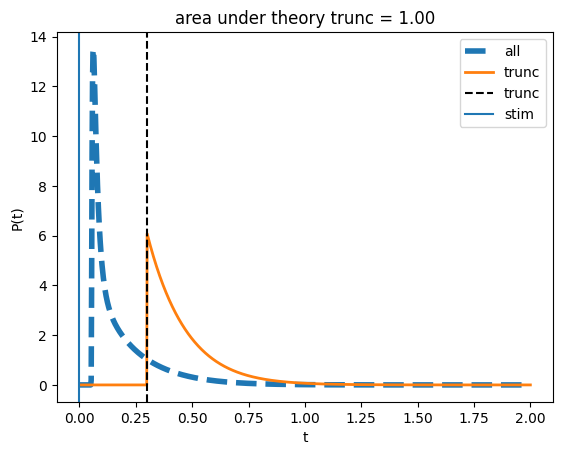

In [29]:
plt.plot(t_pts, theory_all, label='all', linestyle='--', lw=4)
plt.plot(t_pts, theory_trunc, label='trunc', lw=2)
plt.xlabel('t')
plt.ylabel('P(t)')
plt.axvline(T_trunc, color='k', linestyle='--', label='trunc') ;
plt.axvline(t_stim, label='stim')
plt.legend();

from numpy import trapezoid

area = trapezoid(theory_trunc, t_pts)

plt.title(f'area under theory trunc = {area:.2f}');